In [1]:
#import packages
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import impute

from sklearn import model_selection
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import svm
#from sklearn.preprocessing import MinMaxScaler
from patsy import dmatrix

from sklearn import ensemble
from sklearn import tree

from sklearn.pipeline import Pipeline
#from sklearn.linear_model import Lasso
from sklearn import metrics
#from scipy.stats import chi2
#from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

# from pyglmnet import GLMCV
#from pyglmnet.datasets import fetch_group_lasso_data
#import matplotlib.pyplot as plt

from sklearn import cluster

sns.set_style("dark")

## Import Datasets

In [2]:
BASE_DIR = "C:\\Users\\kk67\\Documents\\Documents\\Capstone\\"

X_train = "X_train.csv"
X_test = "X_test.csv"
y_train = "y_train.csv"
y_test = "y_test.csv"

In [3]:
X_train = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, X_train)),index_col=0)
X_test = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, X_test)),index_col=0)
y_train = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, y_train)),index_col=0)
y_test = pd.read_csv(os.path.expanduser(os.path.join(BASE_DIR, y_test)),index_col=0)

In [4]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140394 entries, 0 to 140393
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   GT1JBLWK_label_YES                                             140394 non-null  int64  
 1   HBHUR_label_RURAL                                              140394 non-null  int64  
 2   HHSTATE_label_EAST_SOUTH_CENTRAL                               140394 non-null  int64  
 3   HHSTATE_label_MIDDLE_ATLANTIC                                  140394 non-null  int64  
 4   HHSTATE_label_MOUNTAIN                                         140394 non-null  int64  
 5   HHSTATE_label_NEW_ENGLAND                                      140394 non-null  int64  
 6   HHSTATE_label_PACIFIC                                          140394 non-null  int64  
 7   HHSTATE_label_SOUTH_ATLANTIC                   

In [5]:
X_train.head()

,GT1JBLWK_label_YES,HBHUR_label_RURAL,HHSTATE_label_EAST_SOUTH_CENTRAL,HHSTATE_label_MIDDLE_ATLANTIC,HHSTATE_label_MOUNTAIN,HHSTATE_label_NEW_ENGLAND,HHSTATE_label_PACIFIC,HHSTATE_label_SOUTH_ATLANTIC,HHSTATE_label_WEST_NORTH_CENTRAL,HHSTATE_label_WEST_SOUTH_CENTRAL,...,HHVEHCNT,PLACE,PRICE,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,YOUNGCHILD
0,0,0,0,0,0,0,0,0,0,0,...,0.090909,0.50,0.50,0.609195,0.033333,0.000000,0.454545,0.142857,0.050,0.0
1,0,0,0,0,0,0,0,1,0,0,...,0.090909,0.25,0.25,0.609195,0.033333,0.153846,0.454545,0.142857,0.050,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.090909,0.75,1.00,0.666667,0.033333,0.000000,0.454545,0.000000,0.050,0.0
3,0,0,0,0,0,0,0,0,0,1,...,0.000000,0.50,0.50,0.781609,0.033333,0.230769,0.454545,0.000000,0.005,0.0
4,1,0,0,0,0,0,0,1,0,0,...,0.090909,0.00,0.00,0.344828,0.100000,0.333333,0.363636,0.285714,0.050,0.0


In [6]:
X_train.shape

(140394, 47)

In [7]:
X_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60170 entries, 0 to 60169
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   GT1JBLWK_label_YES                                             60170 non-null  int64  
 1   HBHUR_label_RURAL                                              60170 non-null  int64  
 2   HHSTATE_label_EAST_SOUTH_CENTRAL                               60170 non-null  int64  
 3   HHSTATE_label_MIDDLE_ATLANTIC                                  60170 non-null  int64  
 4   HHSTATE_label_MOUNTAIN                                         60170 non-null  int64  
 5   HHSTATE_label_NEW_ENGLAND                                      60170 non-null  int64  
 6   HHSTATE_label_PACIFIC                                          60170 non-null  int64  
 7   HHSTATE_label_SOUTH_ATLANTIC                              

In [8]:
X_test.head()

,GT1JBLWK_label_YES,HBHUR_label_RURAL,HHSTATE_label_EAST_SOUTH_CENTRAL,HHSTATE_label_MIDDLE_ATLANTIC,HHSTATE_label_MOUNTAIN,HHSTATE_label_NEW_ENGLAND,HHSTATE_label_PACIFIC,HHSTATE_label_SOUTH_ATLANTIC,HHSTATE_label_WEST_NORTH_CENTRAL,HHSTATE_label_WEST_SOUTH_CENTRAL,...,HHVEHCNT,PLACE,PRICE,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,YOUNGCHILD
0,0,0,0,0,1,0,0,0,0,0,...,0.181818,0.25,0.25,0.252874,0.025000,0.076923,0.454545,0.285714,0.065,0.0
1,0,1,0,0,0,0,0,0,1,0,...,0.181818,0.50,0.50,0.689655,0.033333,0.076923,0.363636,0.000000,0.015,0.0
2,0,0,0,0,0,0,0,0,1,0,...,0.000000,1.00,0.25,0.310345,0.033333,0.384615,0.909091,0.142857,0.050,0.2
3,0,0,0,0,0,0,1,0,0,0,...,0.090909,0.50,0.25,0.724138,0.075000,0.410256,0.454545,0.285714,0.025,0.0
4,0,0,0,0,0,0,0,0,0,1,...,0.090909,0.00,0.00,0.356322,0.025000,0.025641,0.454545,0.142857,0.090,0.4


In [9]:
X_test.shape

(60170, 47)

In [10]:
y_train.reset_index(drop=True,inplace=True)

In [11]:
y_train.head()

,fueltype_numeric
0,1
1,1
2,1
3,1
4,1


In [12]:
y_test.reset_index(drop=True,inplace=True)

In [13]:
y_test.head()

,fueltype_numeric
0,1
1,1
2,1
3,1
4,1


## Model Building

Build a naive model

In [14]:
#Function to create threshold and visualize

n_points=50
probs = np.linspace(0, 1, n_points)

def threshold_and_plot(y_test, target, plot=True):

    def make_thresh():  # try n_points = 50 or 100...
    # calculate each metric here
        precision = [
        metrics.precision_score(y_test, np.where(target > thresh, 1, 0))
        for thresh in probs]
        recall = [metrics.recall_score(y_test, np.where(target > thresh, 1, 0))
              for thresh in probs]
        f1 = [metrics.f1_score(y_test, np.where(target > thresh, 1, 0))
          for thresh in probs]
        return precision, recall, f1

    precision, recall, f1 = make_thresh()
    if plot:
        plt.plot(probs, precision, label='precision')
        plt.plot(probs, recall, label='recall')
        plt.plot(probs, f1, label='f1')
        plt.title("Metrics at various thresholds");
        plt.xlabel("Probability");
        plt.ylabel("Metric value")
        plt.legend();
    # print("Precision: {:.3f}; Recall: {:.3f}; F1: {:.3f}".format(precision, recall, f1))
        return precision, recall, f1
    else:
        return precision, recall, f1


def max_thresh(score_vec):
    max_idx = np.argmax(score_vec)
    max_score = score_vec[max_idx]
    return max_idx, max_score

In [15]:
# set up cross-validator:
# 80/20 train/calibration split in this data (test data still held out)
# 200 iterations
# feel free to use another CV method and explain why
cross_validator = (
  model_selection.StratifiedShuffleSplit(train_size=0.8,
                                         random_state=1337,
                                         n_splits=10))

In [16]:
# null model boilerplate
null_reg = LogisticRegression(fit_intercept=False,
                                           max_iter=500,
                                           random_state=632966)

In [17]:
X_train_null = np.ones(shape=y_train.shape[0]).reshape(-1,1) # intercept
X_test_null = np.ones(shape=y_test.shape[0]).reshape(-1,1)

In [18]:
# fit on train and test data (no tuning)
null_train = null_reg.fit(X=X_train_null, y=y_train.values.ravel())
null_test = null_reg.fit(X=X_test_null, y=y_test.values.ravel())

In [19]:
# prob_a (and prob) gives you two columns; second one is the target
#why do we fit with the test here?
train_pred = null_train.predict_proba(X_train_null)
test_pred = null_test.predict_proba(X_test_null)

In [20]:
# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {train_pred[:,1].mean():.3f}")

Observed: 0.970 Fit: 0.971


In [21]:
# 30 values of C to search over (can use fewer to speed things up);
# would need to amend to use L2 or elastic net
model_params = {"model__C": (np.logspace(start=-4, stop=4, num=20))}

In [22]:
# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[("model", null_reg)])

In [23]:
# set up grid search
model_grid = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="roc_auc", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [24]:
# fit model
null_model = model_grid.fit(X_train_null, y_train.values.ravel())

In [25]:
# model predictions
null_train_pred = null_model.predict_proba(X_train_null)
null_test_pred = null_model.predict_proba(X_test_null)

# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {null_train_pred[:,1].mean():.3f}")

Observed: 0.970 Fit: 0.848


C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is i

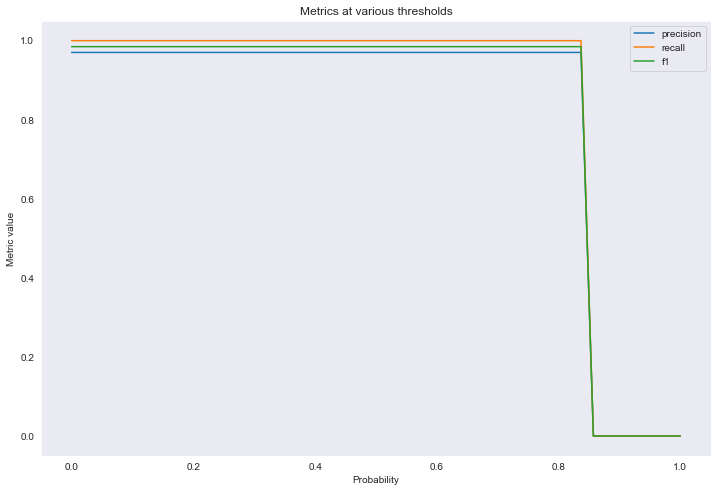

In [26]:
# NEW: vectors of metrics
# TODO: add weighting to them (source function)
plt.figure(figsize=(12,8))
null_reg_pr, null_reg_rec, null_reg_f1 = threshold_and_plot(y_train, null_train_pred[:,1])

In [27]:
# NEW: F1 thresh
max_thresh(null_reg_f1)

(0, 0.9849250591067825)

In [28]:
# NEW: threshold that maximizes value
null_reg_f1_preds = np.where(null_train_pred[:,1] > 0, 1, 0)

In [29]:
# NEW: null F1
train_null = null_model.predict(X_train_null)
test_null = null_model.predict(X_test_null)


null_train_f1 = metrics.f1_score(y_true=y_train, y_pred=train_null, average="weighted")
null_test_f1 = metrics.f1_score(y_true=y_test, y_pred=test_null, average="weighted")

print(f"Train null F1: {null_train_f1:.3}")
print(f"Test null F1: {null_test_f1:.3}")

Train null F1: 0.956
Test null F1: 0.957


In [30]:
null_train_pred

array([[0.15209228, 0.84790772],
       [0.15209228, 0.84790772],
       [0.15209228, 0.84790772],
       ...,
       [0.15209228, 0.84790772],
       [0.15209228, 0.84790772],
       [0.15209228, 0.84790772]])

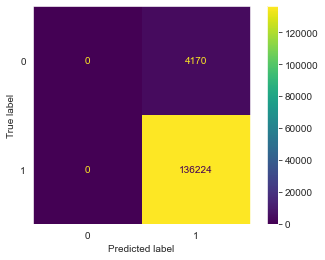

In [31]:
# no normalization
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=null_reg_f1_preds);

Since this is just a naive model, we could expect this result. We will need to see if the other models do better than guessing.

### Limit to Numeric Variabes

In order to reduce the cardinality of the variables, only numeric variables were used for the next few parts for some of the models.

In [32]:
# NEW: numeric only values
X_train_numeric = X_train.iloc[:, 29:]

In [33]:
X_train_numeric.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140394 entries, 0 to 140393
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CAR         140394 non-null  float64
 1   CARSHARE    140394 non-null  float64
 2   DRVRCNT     140394 non-null  float64
 3   EDUC        140394 non-null  float64
 4   HBPPOPDN    140394 non-null  float64
 5   HBRESDN     140394 non-null  float64
 6   HHFAMINC    140394 non-null  float64
 7   HHSIZE      140394 non-null  float64
 8   HHVEHCNT    140394 non-null  float64
 9   PLACE       140394 non-null  float64
 10  PRICE       140394 non-null  float64
 11  R_AGE       140394 non-null  float64
 12  TIMETOWK    140394 non-null  float64
 13  VEHAGE      140394 non-null  float64
 14  VEHOWNMO    140394 non-null  float64
 15  WRKCOUNT    140394 non-null  float64
 16  YEARMILE    140394 non-null  float64
 17  YOUNGCHILD  140394 non-null  float64
dtypes: float64(18)
memory usage: 20.4 MB


In [34]:
X_train_numeric.head()

,CAR,CARSHARE,DRVRCNT,EDUC,HBPPOPDN,HBRESDN,HHFAMINC,HHSIZE,HHVEHCNT,PLACE,PRICE,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,YOUNGCHILD
0,1.00,0.0,0.000,0.75,0.714286,0.428571,0.5,0.000000,0.090909,0.50,0.50,0.609195,0.033333,0.000000,0.454545,0.142857,0.050,0.0
1,1.00,0.0,0.250,0.25,0.571429,0.428571,0.3,0.166667,0.090909,0.25,0.25,0.609195,0.033333,0.153846,0.454545,0.142857,0.050,0.0
2,1.00,0.0,0.125,0.75,0.142857,0.142857,1.0,0.083333,0.090909,0.75,1.00,0.666667,0.033333,0.000000,0.454545,0.000000,0.050,0.0
3,0.75,0.0,0.000,0.00,0.714286,0.571429,0.5,0.000000,0.000000,0.50,0.50,0.781609,0.033333,0.230769,0.454545,0.000000,0.005,0.0
4,1.00,0.0,0.125,0.50,0.571429,0.571429,0.4,0.250000,0.090909,0.00,0.00,0.344828,0.100000,0.333333,0.363636,0.285714,0.050,0.0


In [35]:
X_train_numeric.shape

(140394, 18)

In [36]:
# NEW: numeric only values
X_test_numeric = X_test.iloc[:, 29:]

In [37]:
X_test_numeric.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60170 entries, 0 to 60169
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CAR         60170 non-null  float64
 1   CARSHARE    60170 non-null  float64
 2   DRVRCNT     60170 non-null  float64
 3   EDUC        60170 non-null  float64
 4   HBPPOPDN    60170 non-null  float64
 5   HBRESDN     60170 non-null  float64
 6   HHFAMINC    60170 non-null  float64
 7   HHSIZE      60170 non-null  float64
 8   HHVEHCNT    60170 non-null  float64
 9   PLACE       60170 non-null  float64
 10  PRICE       60170 non-null  float64
 11  R_AGE       60170 non-null  float64
 12  TIMETOWK    60170 non-null  float64
 13  VEHAGE      60170 non-null  float64
 14  VEHOWNMO    60170 non-null  float64
 15  WRKCOUNT    60170 non-null  float64
 16  YEARMILE    60170 non-null  float64
 17  YOUNGCHILD  60170 non-null  float64
dtypes: float64(18)
memory usage: 8.7 MB


In [38]:
X_test_numeric.head()

,CAR,CARSHARE,DRVRCNT,EDUC,HBPPOPDN,HBRESDN,HHFAMINC,HHSIZE,HHVEHCNT,PLACE,PRICE,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,YOUNGCHILD
0,1.0,0.0,0.125,0.75,0.714286,0.571429,0.9,0.083333,0.181818,0.25,0.25,0.252874,0.025000,0.076923,0.454545,0.285714,0.065,0.0
1,1.0,0.0,0.125,0.00,0.000000,0.000000,0.4,0.083333,0.181818,0.50,0.50,0.689655,0.033333,0.076923,0.363636,0.000000,0.015,0.0
2,1.0,0.0,0.000,0.25,0.142857,0.000000,0.3,0.250000,0.000000,1.00,0.25,0.310345,0.033333,0.384615,0.909091,0.142857,0.050,0.2
3,1.0,0.0,0.125,0.50,0.857143,0.714286,0.2,0.083333,0.090909,0.50,0.25,0.724138,0.075000,0.410256,0.454545,0.285714,0.025,0.0
4,1.0,0.0,0.125,0.75,0.571429,0.285714,0.9,0.250000,0.090909,0.00,0.00,0.356322,0.025000,0.025641,0.454545,0.142857,0.090,0.4


In [39]:
X_test_numeric.shape

(60170, 18)

### Logistic Regression

In [40]:
# null model boilerplate
log_reg = LogisticRegression(fit_intercept=True, random_state=632966,
                             class_weight='balanced', penalty="elasticnet",
                             solver="saga", max_iter=500)

#30 values of C to search over (can use fewer to speed things up);
#would need to amend to use L2 or elastic net
model_params = {"model__C": (np.logspace(start=-4, stop=4, num=4)),
                "model__l1_ratio": np.linspace(0., 1., num=4)}

# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[("model", log_reg)])

cross_validator = (
  model_selection.StratifiedShuffleSplit(train_size=0.8,
                                         random_state=1337,
                                         n_splits=10))

# set up grid search
# TODO: ue f-beta
model_grid = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [41]:
%%time
# fit model
log_model = model_grid.fit(X_train_numeric, y_train.values.ravel())

Wall time: 16min 42s


C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
# NEW best params
log_model.best_params_

{'model__C': 0.046415888336127774, 'model__l1_ratio': 0.6666666666666666}

In [43]:
# NEW: best estimator fit
#Question: Why use best_estimator?? - should be the optimal parameter
log_best_train = log_model.best_estimator_.fit(X_train_numeric, y_train.values.ravel())
log_best_train_pred = log_model.best_estimator_.predict_proba(X_train_numeric)

C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
%%time
# NEW: cross-val uncertainty
# TODO: check for convergence
log_reg_cv_scores = (
    model_selection.cross_val_score(log_model.best_estimator_,
                                    X_train_numeric,
                                    y_train.to_numpy().ravel(),
                                    scoring="roc_auc",
                                    cv=cross_validator,
                                    n_jobs=-1))

Wall time: 1min 23s


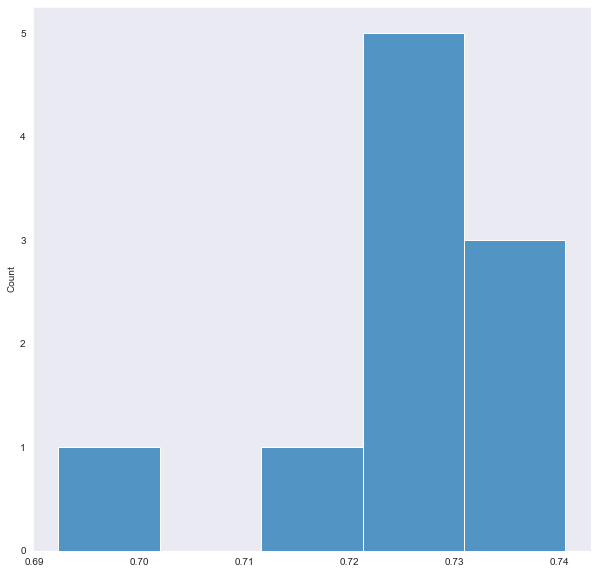

In [45]:
plt.figure(figsize=(10,10))
sns.histplot(log_reg_cv_scores);

In [46]:
# NEW: check shape
log_best_train_pred.shape

(140394, 2)

C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


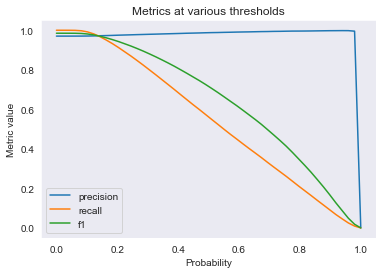

In [47]:
# NEW: vectors of metrics
# TODO: add weighting to them (source function)

log_reg_pr, log_reg_rec, log_reg_f1 = threshold_and_plot(y_train, log_best_train_pred[:,1])

In [48]:
# NEW: F1 thresh
max_thresh(log_reg_f1)

(0, 0.9849250591067825)

In [49]:
# NEW: threshold that maximizes value
log_reg_f1_preds = np.where(log_best_train_pred[:,1] > 0, 1, 0)

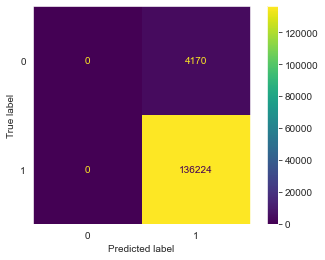

In [50]:
# NEW: confusion matrix

# no normalization
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=log_reg_f1_preds);

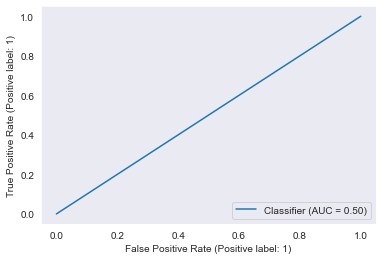

In [51]:
# NEW: ROC AUC
metrics.RocCurveDisplay.from_predictions(y_true=y_train, y_pred=log_reg_f1_preds);

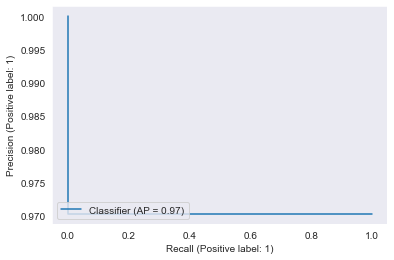

In [52]:
# NEW: PR AUC
metrics.PrecisionRecallDisplay.from_predictions(y_true=y_train, y_pred=log_reg_f1_preds);

In [53]:
# NEW: Matthews correlation
metrics.matthews_corrcoef(y_true=y_train, y_pred=log_reg_f1_preds)

0.0

In [54]:
# NEW : prediction DataFrame
log_reg_pred_df = pd.DataFrame({"targets": y_train.values.ravel(),
                                "preds": log_best_train_pred[:,1]})

log_reg_pred_df.head()

,targets,preds
0,1,0.288828
1,1,0.766959
2,1,0.083978
3,1,0.833315
4,1,0.849495


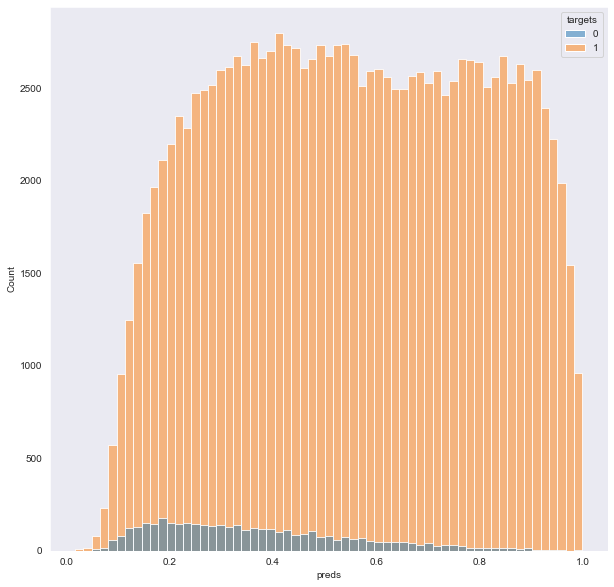

In [55]:
plt.figure(figsize=(10,10));
sns.histplot(data=log_reg_pred_df, x="preds", hue="targets");

In [56]:
# model predictions
log_train_pred = log_model.predict_proba(X_train_numeric)
log_test_pred = log_model.predict_proba(X_test_numeric)

In [57]:
# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {np.mean(log_train_pred[:,1]):.3f}")

Observed: 0.970 Fit: 0.547


C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


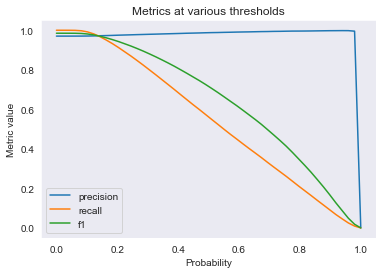

In [58]:
test_metric = threshold_and_plot(y_test=y_train, target=log_train_pred[:,1])

In [59]:
max_idx_c = []
# print out the maximum value
# assumes that "test_metrics" is a tuple to be unpacked
for metric, val in zip(["Precision", "Recall", "F1"], test_metric):
    max_idx, max_val = max_thresh(val)
    val = np.linspace(0, 1, 50)[max_idx]
    max_idx_c.append(val)
    print(f"Maximum {metric}:{max_val:.3f} and id:{np.linspace(0, 1, 50)[max_idx]}")

Maximum Precision:0.998 and id:0.9387755102040816
Maximum Recall:1.000 and id:0.0
Maximum F1:0.985 and id:0.0


In [60]:
##Evaluate on the test data

print("Precision on Test: {0}".format(metrics.precision_score(y_test, np.where(log_test_pred[:,1] > max_idx_c[0], 1, 0))))
print("Recall on Test: {0}".format(metrics.recall_score(y_test, np.where(log_test_pred[:,1] > max_idx_c[1], 1, 0))))
print("F1 score on Test: {0}".format(metrics.f1_score(y_test, np.where(log_test_pred[:,1] > max_idx_c[2], 1, 0))))

Precision on Test: 0.9985212569316081
Recall on Test: 1.0
F1 score on Test: 0.9853202809467196


## Poisson Regression

In [61]:
from sklearn import linear_model
pos_reg = linear_model.PoissonRegressor()

In [62]:
# 30 values of C to search over (can use fewer to speed things up);
# would need to amend to use L2 or elastic net
model_params = {"model__alpha": (np.linspace(0.0,1,20))}

In [63]:
# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[('model', pos_reg)])

In [64]:
# set up grid search
model_grid_pos = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [65]:
# fit model
pos_model = model_grid_pos.fit(X_train_numeric, y_train.values.ravel())

C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


In [66]:
# model predictions
pos_train_pred = pos_model.predict(X_train_numeric)
pos_test_pred = pos_model.predict(X_test_numeric)

In [67]:
# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {np.mean(pos_train_pred):.3f}")

Observed: 0.970 Fit: 0.970


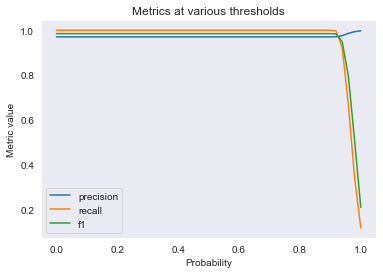

In [68]:
pos_reg_pr, pos_reg_rec, pos_reg_f1 = threshold_and_plot(y_test=y_train, target=pos_train_pred)


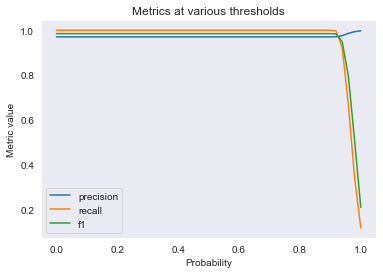

In [69]:
test_metric_pos = threshold_and_plot(y_test=y_train, target=pos_train_pred)

In [70]:
# NEW: F1 thresh
max_thresh(pos_reg_f1)
#results seem to be similar to logistic regression

(0, 0.9849250591067825)

In [71]:
# NEW: threshold that maximizes value
pos_reg_f1_preds = np.where(pos_train_pred> 0, 1, 0)

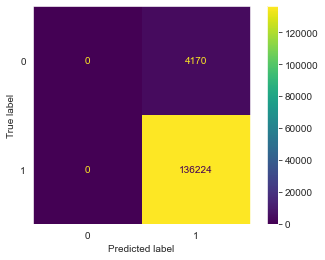

In [72]:
# NEW: confusion matrix

# no normalization
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=pos_reg_f1_preds);
#results are the same

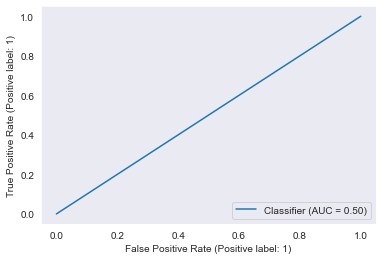

In [73]:
# NEW: ROC AUC
metrics.RocCurveDisplay.from_predictions(y_true=y_train, y_pred=pos_reg_f1_preds);
#once again guessing happening

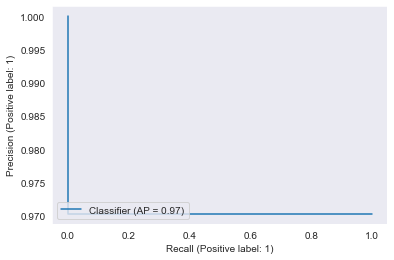

In [74]:
# NEW: PR AUC
metrics.PrecisionRecallDisplay.from_predictions(y_true=y_train, y_pred=pos_reg_f1_preds);

In [75]:
# NEW: Matthews correlation
metrics.matthews_corrcoef(y_true=y_train, y_pred=pos_reg_f1_preds)

0.0

In [76]:
max_idx_c = []
# print out the maximum value
# assumes that "test_metrics" is a tuple to be unpacked
for metric, val in zip(["Precision", "Recall", "F1"], test_metric_pos):
    max_idx, max_val = max_thresh(val)
    val = np.linspace(0, 1, 50)[max_idx]
    max_idx_c.append(val)
    print(f"Maximum {metric}:{max_val:.3f} and id:{np.linspace(0, 1, 50)[max_idx]}")

Maximum Precision:0.997 and id:1.0
Maximum Recall:1.000 and id:0.0
Maximum F1:0.985 and id:0.0


In [77]:
##Evaluate on the test data

print("Precision on Test: {0}".format(metrics.precision_score(y_test, np.where(pos_test_pred> max_idx_c[0], 1, 0))))
print("Recall on Test: {0}".format(metrics.recall_score(y_test, np.where(pos_test_pred > max_idx_c[1], 1, 0))))
print("F1 score on Test: {0}".format(metrics.f1_score(y_test, np.where(pos_test_pred > max_idx_c[2], 1, 0))))

Precision on Test: 0.9980879541108987
Recall on Test: 1.0
F1 score on Test: 0.9853202809467196


### Random Forest

In [78]:
rfc = RandomForestClassifier(random_state = 42)

In [79]:
# 30 values of C to search over (can use fewer to speed things up);
# would need to amend to use L2 or elastic net
model_params = {'model__n_estimators': [100, 200],
    'model__max_features': ['auto', 'sqrt'],
    'model__max_depth' : [4, 5, 6],
    'model__criterion' :['gini']}

In [80]:
# set up the pipeline: just contains the model object
model_pipeline = Pipeline(steps=[('model', rfc)])

In [81]:
# set up grid search
model_grid_rfc = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [82]:
# fit model
rfc_model = model_grid_rfc.fit(X_train_numeric, y_train.values.ravel())

In [83]:
X_train_numeric.shape

(140394, 18)

In [84]:
# model predictions
rfc_train_pred = rfc_model.predict_proba(X_train_numeric)
rfc_test_pred = rfc_model.predict_proba(X_test_numeric)

In [85]:
rfc_train_pred

array([[0.03174154, 0.96825846],
       [0.02835758, 0.97164242],
       [0.03266777, 0.96733223],
       ...,
       [0.02793491, 0.97206509],
       [0.02060048, 0.97939952],
       [0.04088367, 0.95911633]])

In [86]:

# check to see if close to population value
print(f"Observed: {y_train.values.ravel().mean():.3f} Fit: {np.mean(rfc_train_pred[:,1]):.3f}")

Observed: 0.970 Fit: 0.970


C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


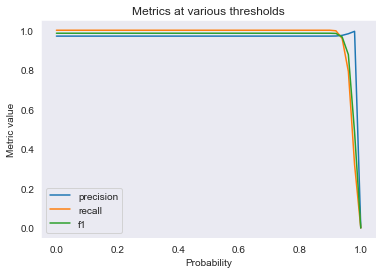

In [87]:
rfc_reg_pr, rfc_reg_rec, rfc_reg_f1 = threshold_and_plot(y_test=y_train, target=rfc_train_pred[:,1])




C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


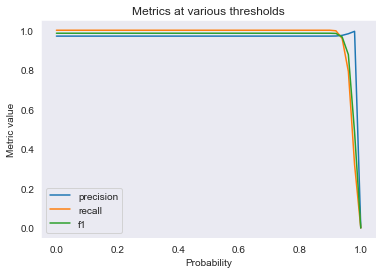

In [88]:
test_metric_rfc = threshold_and_plot(y_test=y_train, target=rfc_train_pred[:,1])

In [89]:
# NEW: F1 thresh
max_thresh(rfc_reg_f1)
#results seem to be similar to logistic regression

(0, 0.9849250591067825)

In [90]:
# NEW: threshold that maximizes value
rfc_reg_f1_preds = np.where(rfc_train_pred[:,1]> 0, 1, 0)

In [91]:
rfc_reg_f1_preds.shape

(140394,)

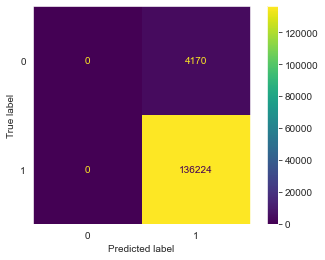

In [92]:
# NEW: confusion matrix

# no normalization
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=rfc_reg_f1_preds);
#results are the same

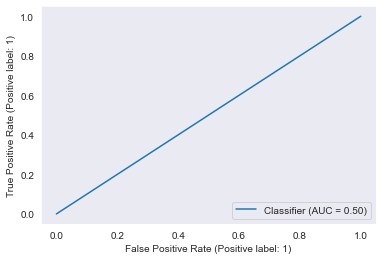

In [93]:
# NEW: ROC AUC
metrics.RocCurveDisplay.from_predictions(y_true=y_train, y_pred=rfc_reg_f1_preds);
#once again guessing happening

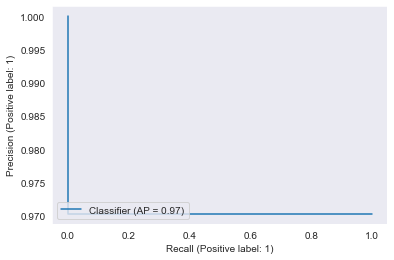

In [94]:
# NEW: PR AUC
metrics.PrecisionRecallDisplay.from_predictions(y_true=y_train, y_pred=rfc_reg_f1_preds);

In [95]:
# NEW: Matthews correlation
metrics.matthews_corrcoef(y_true=y_train, y_pred=pos_reg_f1_preds)

0.0

In [96]:
max_idx_c = []
# print out the maximum value
# assumes that "test_metrics" is a tuple to be unpacked
for metric, val in zip(["Precision", "Recall", "F1"], test_metric_rfc):
    max_idx, max_val = max_thresh(val)
    val = np.linspace(0, 1, 50)[max_idx]
    max_idx_c.append(val)
    print(f"Maximum {metric}:{max_val:.3f} and id:{np.linspace(0, 1, 50)[max_idx]}")

Maximum Precision:0.995 and id:0.9795918367346939
Maximum Recall:1.000 and id:0.0
Maximum F1:0.985 and id:0.0


In [97]:
##Evaluate on the test data

print("Precision on Test: {0}".format(metrics.precision_score(y_test, np.where(rfc_test_pred[:,1] > max_idx_c[0], 1, 0))))
print("Recall on Test: {0}".format(metrics.recall_score(y_test, np.where(rfc_test_pred[:,1] > max_idx_c[1], 1, 0))))
print("F1 score on Test: {0}".format(metrics.f1_score(y_test, np.where(rfc_test_pred[:,1] > max_idx_c[2], 1, 0))))

Precision on Test: 0.9948064464314398
Recall on Test: 1.0
F1 score on Test: 0.9853202809467196


# NEW: numeric variable importance

In [98]:
%%time
# fit AdaBoost model
ada_def = ensemble.AdaBoostClassifier(n_estimators=150,
                                      random_state=2021)
ada_model = ada_def.fit(X_train, y_train.values.ravel())

Wall time: 21.7 s


In [99]:
%%time
# fit gradient boosting model
gb_def = ensemble.GradientBoostingClassifier(n_estimators=150,
                                             loss="deviance",
                                             max_features="sqrt",
                                             random_state=2021)
gb_model = gb_def.fit(X_train_numeric, y_train.values.ravel())

Wall time: 8.64 s


In [100]:
# calculate variable importance
ada_rel_importance = ada_model.feature_importances_
gb_rel_importance = gb_model.feature_importances_

# TODO: determine correct amount to take
# ADA
ada_feature_importance = 100.0 * (ada_rel_importance / ada_rel_importance.max())
ada_sorted_idx = np.argsort(ada_feature_importance)
ada_sorted_cols = X_train.columns.values[ada_sorted_idx]

# GB
gb_feature_importance = 100.0 * (gb_rel_importance / gb_rel_importance.max())
gb_sorted_idx = np.argsort(gb_feature_importance)
gb_sorted_cols = X_train.columns.values[gb_sorted_idx]


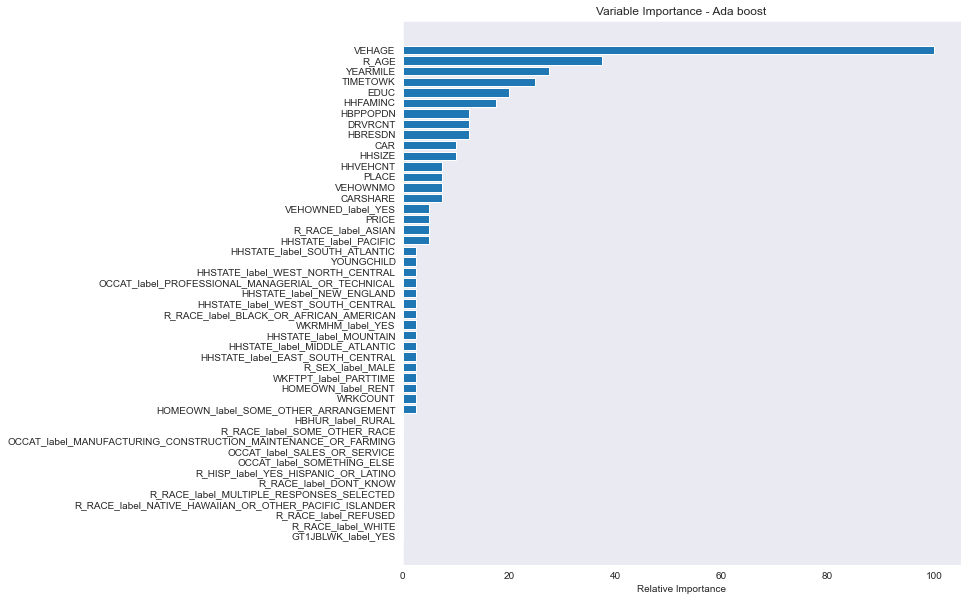

In [101]:
pos = np.arange(ada_sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,10))
plt.barh(pos, ada_feature_importance[ada_sorted_idx], align='center')
plt.yticks(pos, ada_sorted_cols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance - Ada boost')
plt.show()

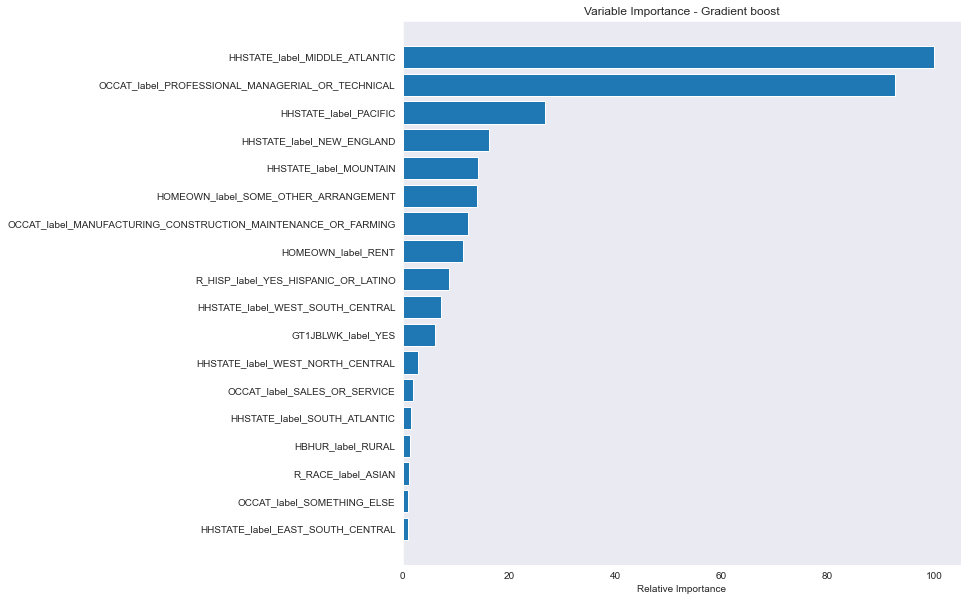

In [102]:
pos = np.arange(gb_sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,10))
plt.barh(pos, gb_feature_importance[gb_sorted_idx], align='center')
plt.yticks(pos, gb_sorted_cols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance - Gradient boost')
plt.show()

In [103]:
impt_fmla = "HHSTATE_label_PACIFIC * EDUC * HHFAMINC * R_AGE * PLACE * PRICE - 1"
X_train_import = dmatrix(impt_fmla, X_train)
X_train_names = X_train_import.design_info.column_names

In [104]:
type(X_train_import)

patsy.design_info.DesignMatrix

# NEW: Support Vector Classifier

In [105]:
'''svc = svm.SVC(kernel="linear", gamma="scale", shrinking=True,
              probability=True, class_weight="balanced",
              random_state=1337)

# model_params = {"model__C": (np.logspace(start=-4, stop=4, num=10))}
model_params = {"model__C": [1.]}

model_pipeline = Pipeline(steps=[("model", svc)])

cross_validator = (
  model_selection.StratifiedShuffleSplit(train_size=0.8,
                                         random_state=1337,
                                         n_splits=10))

# set up grid search
# TODO: ue f-beta
model_grid = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="f1_weighted", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))'''

'svc = svm.SVC(kernel="linear", gamma="scale", shrinking=True,\n              probability=True, class_weight="balanced",\n              random_state=1337)\n\n# model_params = {"model__C": (np.logspace(start=-4, stop=4, num=10))}\nmodel_params = {"model__C": [1.]}\n\nmodel_pipeline = Pipeline(steps=[("model", svc)])\n\ncross_validator = (\n  model_selection.StratifiedShuffleSplit(train_size=0.8,\n                                         random_state=1337,\n                                         n_splits=10))\n\n# set up grid search\n# TODO: ue f-beta\nmodel_grid = (GridSearchCV(estimator=model_pipeline,\n                               param_grid=model_params,\n                               refit=True, # refit using best estimates\n                               scoring="f1_weighted", # metric to optimize\n                               cv=cross_validator,\n                               n_jobs=-1))'

In [106]:
'''%%time
svc_model = model_grid.fit(X_train_numeric, y_train.values.ravel())'''

'%%time\nsvc_model = model_grid.fit(X_train_numeric, y_train.values.ravel())'

# SGD Classifier

In [107]:
# hing loss = linear SVM
sgd = linear_model.SGDClassifier(loss="modified_huber", penalty="l2",
                                 fit_intercept=True, n_jobs=-1,
                                 random_state=1337, eta0=1e-3,
                                 validation_fraction=0.2)


model_params = {"model__alpha": np.linspace(-3., 3., 10)}

model_pipeline = Pipeline(steps=[("model", sgd)])

cross_validator = (
  model_selection.StratifiedShuffleSplit(train_size=0.8,
                                         random_state=1337,
                                         n_splits=10))

# set up grid search
# TODO: ue f-beta
model_grid = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=True, # refit using best estimates
                               scoring="roc_auc", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))

In [108]:
%%time
sgd_model = sgd.partial_fit(np.array(X_train_import), y_train.values.ravel(), np.unique(y_train))

Wall time: 93.2 ms


In [109]:
sgd_best_train_pred = sgd_model.predict_proba(np.array(X_train_import))

In [110]:
%%time
sgd_cv_scores = (
    model_selection.cross_val_score(sgd_model,
                                    np.array(X_train_import),
                                    y_train.to_numpy().ravel(),
                                    scoring="roc_auc",
                                    cv=cross_validator,
                                    n_jobs=-1))

Wall time: 2.81 s


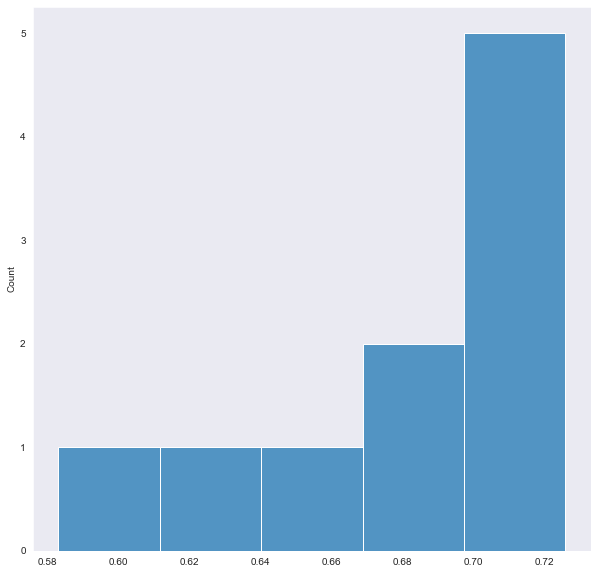

In [111]:
plt.figure(figsize=(10,10))
sns.histplot(sgd_cv_scores);

C:\Users\kk67\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


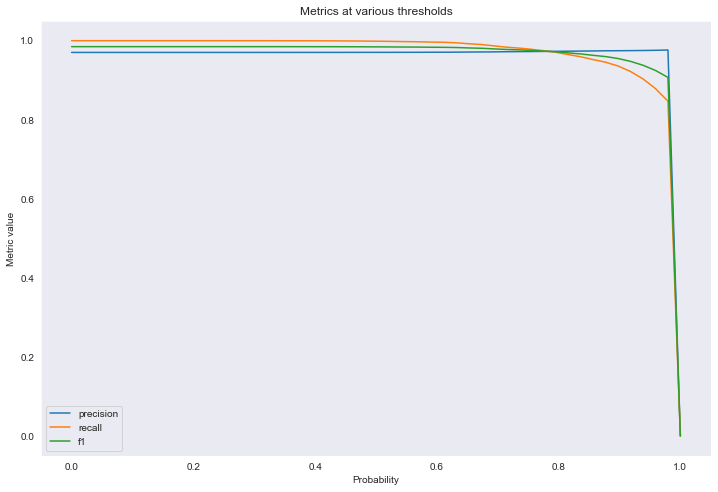

In [112]:
plt.figure(figsize=(12,8))
sgd_pr, sgd_rec, sgd_f1 = threshold_and_plot(y_train, sgd_best_train_pred[:,1])

In [113]:
max_thresh(sgd_f1)

(0, 0.9849250591067825)

In [114]:
sgd_f1_preds = np.where(sgd_best_train_pred[:,1] > 0, 1, 0)

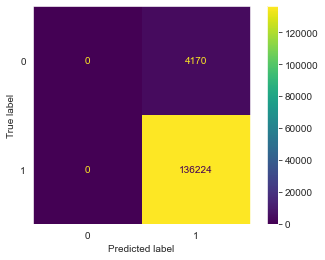

In [115]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=sgd_f1_preds);

In [116]:
sgd_pred_df = pd.DataFrame({"targets": y_train.values.ravel(),
                            "preds": sgd_best_train_pred[:,1]})

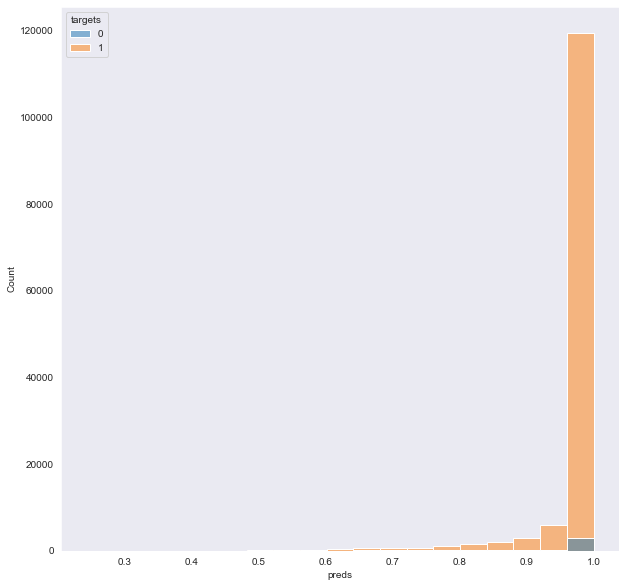

In [117]:
plt.figure(figsize=(10,10));
sns.histplot(data=sgd_pred_df, x="preds", hue="targets");

# NEW: DNN (why not?)

In [118]:
'''# layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# calbacks/checkpoints
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# regularization, initializers, optimizers, activations, losses
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import losses
from tensorflow.keras import metrics as tf_metrics
'''

'# layers\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.layers import Dropout\n\n# calbacks/checkpoints\nfrom tensorflow.keras.callbacks import Callback\nfrom tensorflow.keras.callbacks import ModelCheckpoint\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom tensorflow.keras.callbacks import LearningRateScheduler\nfrom tensorflow.keras.callbacks import ReduceLROnPlateau\n\n# regularization, initializers, optimizers, activations, losses\nfrom tensorflow.keras import regularizers\nfrom tensorflow.keras import initializers\nfrom tensorflow.keras import optimizers\nfrom tensorflow.keras import activations\nfrom tensorflow.keras import losses\nfrom tensorflow.keras import metrics as tf_metrics\n'

In [119]:
'''# epoch monitoring
def scheduler(epoch, lr):
  if epoch < int(epoch * 0.75):
    return lr
  else:
    return lr * tf.math.exp(-0.1)

def callbacks():
  early_stop = EarlyStopping(monitor="loss", patience=30,
                             mode="min", min_delta=0.01)
  lr_schedule = LearningRateScheduler(scheduler)
  lr_plateau = ReduceLROnPlateau(monitor="loss", factor=0.8, patience=30)
  return (early_stop, lr_schedule, lr_plateau)

early_stop, lr_schedule, lr_plateau = callbacks()
'''

'# epoch monitoring\ndef scheduler(epoch, lr):\n  if epoch < int(epoch * 0.75):\n    return lr\n  else:\n    return lr * tf.math.exp(-0.1)\n\ndef callbacks():\n  early_stop = EarlyStopping(monitor="loss", patience=30,\n                             mode="min", min_delta=0.01)\n  lr_schedule = LearningRateScheduler(scheduler)\n  lr_plateau = ReduceLROnPlateau(monitor="loss", factor=0.8, patience=30)\n  return (early_stop, lr_schedule, lr_plateau)\n\nearly_stop, lr_schedule, lr_plateau = callbacks()\n'

In [120]:
'''# new nn def'n with important variables

def logistic_impt_model(n_features):
  # input layer: (batch_size, features); batch_size implied
  input_layer = Dense(units=18,
                      input_shape=(n_features,),
                      activation="elu",
                      name="input")
  hidden_1 = Dense(units=18, activation="elu", name="hidden_1")
  drop_1 = Dropout(rate=0.1, name="dropout_1")
  hidden_2 = Dense(units=16, activation="elu", name="hidden_2")
  drop_2 = Dropout(rate=0.5, name="dropout_2")
  hidden_3 = Dense(units=8, activation="elu", name="hidden_3")
  hidden_4 = Dense(units=8, activation="elu", name="hidden_4")
  hidden_5 = Dense(units=4, activation="elu", name="hidden_5")
  hidden_6 = Dense(units=2, activation="elu", name="hidden_6")
  output_layer = Dense(units=1, name="output", activation="sigmoid")

  # build model
  model = Sequential(name="logistic_model")
  model.add(input_layer)
  model.add(hidden_1)
  model.add(drop_1)
  model.add(hidden_2)
  model.add(drop_2)
  model.add(hidden_3)
  model.add(hidden_4)
  model.add(hidden_5)
  model.add(hidden_6)
  model.add(output_layer)

  # compilation; learning rate set by scheduler

  model.compile(optimizer=optimizers.SGD(momentum=0.9,
                                         nesterov=True),
                loss="binary_crossentropy",
                metrics=[tf_metrics.BinaryAccuracy(name="accuracy"),
                         tf_metrics.Precision(name="precision"),
                         tf_metrics.Recall(name="recall"),
                         tf_metrics.AUC(name="auc"),
                         tf_metrics.AUC(name="pr_auc", curve="PR"),
                         #tf_metrics.TrueNegatives(name="true_neg"),
                         #tf_metrics.TruePositives(name="true_pos"),
                         #tf_metrics.FalseNegatives(name="false_neg"),
                         #tf_metrics.FalsePositives(name="false_pos"),
                         ])
  return model'''

'# new nn def\'n with important variables\n\ndef logistic_impt_model(n_features):\n  # input layer: (batch_size, features); batch_size implied\n  input_layer = Dense(units=18,\n                      input_shape=(n_features,),\n                      activation="elu",\n                      name="input")\n  hidden_1 = Dense(units=18, activation="elu", name="hidden_1")\n  drop_1 = Dropout(rate=0.1, name="dropout_1")\n  hidden_2 = Dense(units=16, activation="elu", name="hidden_2")\n  drop_2 = Dropout(rate=0.5, name="dropout_2")\n  hidden_3 = Dense(units=8, activation="elu", name="hidden_3")\n  hidden_4 = Dense(units=8, activation="elu", name="hidden_4")\n  hidden_5 = Dense(units=4, activation="elu", name="hidden_5")\n  hidden_6 = Dense(units=2, activation="elu", name="hidden_6")\n  output_layer = Dense(units=1, name="output", activation="sigmoid")\n\n  # build model\n  model = Sequential(name="logistic_model")\n  model.add(input_layer)\n  model.add(hidden_1)\n  model.add(drop_1)\n  model.a

In [121]:
'''logistic_nn = logistic_impt_model(46)
logistic_nn.summary()'''

'logistic_nn = logistic_impt_model(46)\nlogistic_nn.summary()'

In [122]:
# see test predictions w/o training
#untrained_test = logistic_nn.predict(X_test)
#tf.reduce_mean(untrained_test, axis=0)

In [123]:
# 2 ** np.linspace(0, 12, num=13)

In [124]:
# X_train_reduce = X_train.drop("VEHAGE",axis=1)
# X_train_reduce.shape

In [125]:
# %%time
# # train model

# early_stop, lr_schedule, lr_plateau = callbacks()

# nn_impt_history = logistic_nn.fit(x=X_train_reduce,
#                                   y=y_train.values.ravel(),
#                                   validation_split=0.2,
#                                   epochs=10_000,
#                                   callbacks=[early_stop, lr_schedule, lr_plateau],
#                                   batch_size=4096,
#                                   verbose=0)

In [126]:
# loss_impt_df = pd.DataFrame(nn_impt_history.history)

# loss_impt_df.tail()

In [127]:
# # plot learning curves
# fig = plt.figure(figsize=(15,10))

# epochs = np.arange(loss_impt_df.shape[0])

# # Loss plot
# ax = fig.add_subplot(221)
# ax.plot(epochs, loss_impt_df['loss'], label="Train")
# ax.plot(epochs, loss_impt_df['val_loss'], label="Validation")
# ax.set_xlabel("Epochs")
# ax.set_ylabel("Loss")
# ax.set_title("Loss vs Epochs")
# ax.legend();

# # Accuracy plot
# ax = fig.add_subplot(222)
# ax.plot(epochs, loss_impt_df['accuracy'], label="Train")
# ax.plot(epochs, loss_impt_df['val_accuracy'], label="Validation")
# ax.set_xlabel("Epochs")
# ax.set_ylabel("Accuracy")
# ax.set_title("Accuracy vs Epochs")
# ax.legend();

# # precision plot
# ax = fig.add_subplot(223)
# ax.plot(epochs, loss_impt_df['precision'], label="Train")
# ax.plot(epochs, loss_impt_df['val_precision'], label="Validation")
# ax.set_xlabel("Epochs")
# ax.set_ylabel("Precision")
# ax.set_title("Precision vs Epochs")
# ax.legend();

# # recall plot
# ax = fig.add_subplot(224)
# ax.plot(epochs, loss_impt_df['recall'], label="Train")
# ax.plot(epochs, loss_impt_df['val_recall'], label="Validation")
# ax.set_xlabel("Epochs")
# ax.set_ylabel("Recall")
# ax.set_title("Recall vs Epochs")
# ax.legend();


In [128]:
#logistic_nn_impt_trained_predict = logistic_nn.predict(X_test)

In [129]:
# # make binary values(use convention)
# logistic_nn_impt_label = np.where(logistic_nn_impt_trained_predict > 0.5, 1., 0.)

# # check confusion matrix
# logistic_impt_conf_mtx = (
#     metrics.confusion_matrix(y_true=y_test.values.ravel(), y_pred=logistic_nn_impt_label))


In [130]:
# print(logistic_impt_conf_mtx)

# NEW: one-class SVM

In [131]:
'''# hing loss = linear SVM
oc_svm = svm.OneClassSVM(kernel="rbf", gamma="scale",
                         tol=0.05)

model_pipeline = Pipeline(steps=[("model", oc_svm)])

cross_validator = (
  model_selection.StratifiedShuffleSplit(train_size=0.8,
                                         random_state=1337,
                                         n_splits=10))

# set up grid search
# TODO: ue f-beta
model_grid = (GridSearchCV(estimator=model_pipeline,
                               param_grid=model_params,
                               refit=False, # no searching here
                               scoring="roc_auc", # metric to optimize
                               cv=cross_validator,
                               n_jobs=-1))'''

'# hing loss = linear SVM\noc_svm = svm.OneClassSVM(kernel="rbf", gamma="scale",\n                         tol=0.05)\n\nmodel_pipeline = Pipeline(steps=[("model", oc_svm)])\n\ncross_validator = (\n  model_selection.StratifiedShuffleSplit(train_size=0.8,\n                                         random_state=1337,\n                                         n_splits=10))\n\n# set up grid search\n# TODO: ue f-beta\nmodel_grid = (GridSearchCV(estimator=model_pipeline,\n                               param_grid=model_params,\n                               refit=False, # no searching here\n                               scoring="roc_auc", # metric to optimize\n                               cv=cross_validator,\n                               n_jobs=-1))'

In [132]:
'''# random sample for testing
X_train_sample = X_train.sample(frac=0.1)'''

'# random sample for testing\nX_train_sample = X_train.sample(frac=0.1)'

In [133]:
#X_train_sample.info(verbose=True)

In [134]:
#X_train_sample.shape

In [135]:
#X_train_sample.head()

In [136]:
#%%time
#oc_svm_model = oc_svm.fit(X_train_sample, y_train.values.ravel())

In [137]:
# test predictions
#oc_svm_test_pred = oc_svm_model.predict(X_test)

In [138]:
#pd.Series(oc_svm_test_pred).value_counts()

# NEW: Clustering

In [139]:
%whos

Variable                 Type                          Data/Info
----------------------------------------------------------------
BASE_DIR                 str                           C:\Users\kk67\Documents\Documents\Capstone\
GridSearchCV             ABCMeta                       <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
LogisticRegression       type                          <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
Pipeline                 ABCMeta                       <class 'sklearn.pipeline.Pipeline'>
RandomForestClassifier   ABCMeta                       <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X_test                   DataFrame                            GT1JBLWK_label_YES<...>[60170 rows x 47 columns]
X_test_null              ndarray                       60170x1: 60170 elems, type `float64`, 481360 bytes (470.078125 kb)
X_test_numeric           DataFrame                            CAR  CARSHARE  DRV<...>[60170 rows x 18 columns]
X_t

## k-means

In [140]:
k_means = cluster.KMeans(n_clusters=2, # EV/non-EV (in theory)
                                       init="k-means++",
                                       max_iter=1000,
                                       random_state=1337)

In [141]:
%%time
k_means_fit = k_means.fit(X_train_numeric)

Wall time: 840 ms


In [142]:
k_means_fit.predict(X_train_numeric).shape

(140394,)

In [143]:
kmeans_cluster_id =k_means_fit.predict(X_train_numeric)

In [144]:
kmeans_predict = pd.DataFrame({"kmeans_cluster_id": kmeans_cluster_id})

In [145]:
kmeans_cf_matrix = metrics.confusion_matrix(y_train,kmeans_cluster_id, normalize='true')

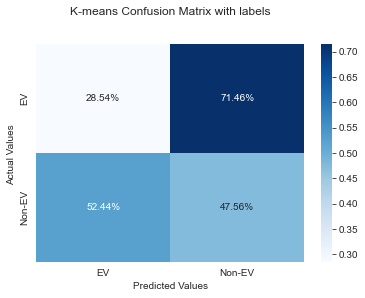

In [146]:
ax = sns.heatmap(kmeans_cf_matrix, annot=True, fmt='.2%', cmap='Blues')

ax.set_title('K-means Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['EV','Non-EV'])
ax.yaxis.set_ticklabels(['EV','Non-EV'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Mini-batch k-means

In [147]:
mini_batch_k = cluster.MiniBatchKMeans(n_clusters=2, # EV/non-EV (in theory)
                                       init="k-means++",
                                       max_iter=500,
                                       batch_size=4096,
                                       random_state=1337)

In [148]:
%%time
mini_batch_fit = mini_batch_k.fit(X_train_numeric)

Wall time: 173 ms


In [149]:
mini_batch_fit.predict(X_train_numeric).shape

(140394,)

In [150]:
mini_batch_cluster_id = mini_batch_fit.predict(X_train_numeric)

In [151]:
mini_batch_predict = pd.DataFrame({"mini_batch_cluster_id": mini_batch_cluster_id})


In [152]:
mini_batch_cf_matrix = metrics.confusion_matrix(y_train,mini_batch_cluster_id, normalize='true')

In [153]:
print(mini_batch_cf_matrix)

[[0.31199041 0.68800959]
 [0.54653365 0.45346635]]


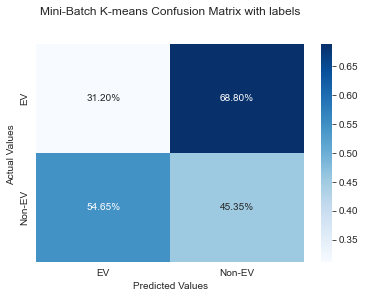

In [154]:
ax = sns.heatmap(mini_batch_cf_matrix, annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Mini-Batch K-means Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['EV','Non-EV'])
ax.yaxis.set_ticklabels(['EV','Non-EV'])

## Display the visualization of the Confusion Matrix.
plt.show()

These predictions seem better than the values we received throught supervised learning

### Prepare For Dashboard

In [155]:
y_train

,fueltype_numeric
0,1
1,1
2,1
3,1
4,1
...,...
140389,1
140390,1
140391,1
140392,1


In [156]:
X_train_labeled_kmeans= pd.concat([X_train_numeric, kmeans_predict,y_train], axis=1)
X_train_labeled_mini= pd.concat([X_train_numeric, mini_batch_predict,y_train], axis=1)

X_train_labeled_kmeans['type'] = 'Kmeans'
X_train_labeled_mini['type'] = 'Mini-Batch'

#X_train_labeled_kmeans_mini.rename(columns={'fueltype_numeric':'y_train'}, inplace=True)

In [157]:
X_train_labeled_kmeans.rename(columns = {'kmeans_cluster_id':'predict'}, inplace=True)
X_train_labeled_mini.rename(columns = {'mini_batch_cluster_id':'predict'}, inplace=True)

In [158]:
X_train_labeled_kmeans_mini = pd.concat([X_train_labeled_kmeans, X_train_labeled_mini], axis=0)
X_train_labeled_kmeans_mini.rename(columns = {'fueltype_numeric':'y_train'}, inplace=True)


In [159]:
X_train_labeled_kmeans_mini.head()

,CAR,CARSHARE,DRVRCNT,EDUC,HBPPOPDN,HBRESDN,HHFAMINC,HHSIZE,HHVEHCNT,PLACE,...,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,YOUNGCHILD,predict,y_train,type
0,1.00,0.0,0.000,0.75,0.714286,0.428571,0.5,0.000000,0.090909,0.50,...,0.609195,0.033333,0.000000,0.454545,0.142857,0.050,0.0,1,1,Kmeans
1,1.00,0.0,0.250,0.25,0.571429,0.428571,0.3,0.166667,0.090909,0.25,...,0.609195,0.033333,0.153846,0.454545,0.142857,0.050,0.0,1,1,Kmeans
2,1.00,0.0,0.125,0.75,0.142857,0.142857,1.0,0.083333,0.090909,0.75,...,0.666667,0.033333,0.000000,0.454545,0.000000,0.050,0.0,0,1,Kmeans
3,0.75,0.0,0.000,0.00,0.714286,0.571429,0.5,0.000000,0.000000,0.50,...,0.781609,0.033333,0.230769,0.454545,0.000000,0.005,0.0,0,1,Kmeans
4,1.00,0.0,0.125,0.50,0.571429,0.571429,0.4,0.250000,0.090909,0.00,...,0.344828,0.100000,0.333333,0.363636,0.285714,0.050,0.0,1,1,Kmeans


In [160]:
#read min-max file

#os.getcwd()

min_max = pd.read_csv("C:\\Users\\kk67\\Documents\\Documents\\Capstone\\min_max.csv", index_col=0)

In [161]:
min_max.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0
0,5.0,79.0,9.0,5.0,8.0,8.0,11.0,13.0,12.0,5.0,5.0,92.0,600.0,40.0,11.0,7.0,200000.0,5.0


In [162]:
#Remove last three columns
X_train_labeled_kmeans_mini_sub = X_train_labeled_kmeans_mini.iloc[:,0:(X_train_labeled_kmeans_mini.shape[1]-3)]

In [163]:
X_train_labeled_kmeans_mini_sub.head()

,CAR,CARSHARE,DRVRCNT,EDUC,HBPPOPDN,HBRESDN,HHFAMINC,HHSIZE,HHVEHCNT,PLACE,PRICE,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,YOUNGCHILD
0,1.00,0.0,0.000,0.75,0.714286,0.428571,0.5,0.000000,0.090909,0.50,0.50,0.609195,0.033333,0.000000,0.454545,0.142857,0.050,0.0
1,1.00,0.0,0.250,0.25,0.571429,0.428571,0.3,0.166667,0.090909,0.25,0.25,0.609195,0.033333,0.153846,0.454545,0.142857,0.050,0.0
2,1.00,0.0,0.125,0.75,0.142857,0.142857,1.0,0.083333,0.090909,0.75,1.00,0.666667,0.033333,0.000000,0.454545,0.000000,0.050,0.0
3,0.75,0.0,0.000,0.00,0.714286,0.571429,0.5,0.000000,0.000000,0.50,0.50,0.781609,0.033333,0.230769,0.454545,0.000000,0.005,0.0
4,1.00,0.0,0.125,0.50,0.571429,0.571429,0.4,0.250000,0.090909,0.00,0.00,0.344828,0.100000,0.333333,0.363636,0.285714,0.050,0.0


In [164]:
X_train_labeled_kmeans_mini_sub.shape

(280788, 18)

In [165]:
#Calculate original values
X_train_labeled_kmeans_mini_ori = np.multiply(X_train_labeled_kmeans_mini_sub,(min_max.iloc[1,:].to_numpy() - min_max.iloc[0,:].to_numpy())) + min_max.iloc[0,:].to_numpy()

In [166]:
X_train_labeled_kmeans_mini_ori.head()

,CAR,CARSHARE,DRVRCNT,EDUC,HBPPOPDN,HBRESDN,HHFAMINC,HHSIZE,HHVEHCNT,PLACE,PRICE,R_AGE,TIMETOWK,VEHAGE,VEHOWNMO,WRKCOUNT,YEARMILE,YOUNGCHILD
0,5.0,0.0,1.0,4.0,6.0,4.0,6.0,1.0,2.0,3.0,3.0,58.0,20.0,1.0,5.0,1.0,10000.0,0.0
1,5.0,0.0,3.0,2.0,5.0,4.0,4.0,3.0,2.0,2.0,2.0,58.0,20.0,7.0,5.0,1.0,10000.0,0.0
2,5.0,0.0,2.0,4.0,2.0,2.0,11.0,2.0,2.0,4.0,5.0,63.0,20.0,1.0,5.0,0.0,10000.0,0.0
3,4.0,0.0,1.0,1.0,6.0,5.0,6.0,1.0,1.0,3.0,3.0,73.0,20.0,10.0,5.0,0.0,1000.0,0.0
4,5.0,0.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,1.0,1.0,35.0,60.0,14.0,4.0,2.0,10000.0,0.0


In [167]:
X_train_labeled_kmeans_mini_ori.shape

(280788, 18)

In [168]:
#read codebook file to apply labels for categorical variables

codebook_reshape = pd.read_csv("C:\\Users\\kk67\\Documents\\Documents\\Capstone\\codebook_reshape.csv", index_col=0)

In [169]:
codebook_reshape.head()

,Name,Type,Code / Range,New,New_m
0,CAR,C,-8=I don't know=-7=I prefer not to answer=-1=A...,"['-8', ""I don't know"", '-7', 'I prefer not to ...","{'-8': ""I don't know"", '-7': 'I prefer not to ..."
1,EDUC,C,-8=I don't know=-7=I prefer not to answer=-1=A...,"['-8', ""I don't know"", '-7', 'I prefer not to ...","{'-8': ""I don't know"", '-7': 'I prefer not to ..."
2,FUELTYPE,C,-8=I don't know=-7=I prefer not to answer=01=G...,"['-8', ""I don't know"", '-7', 'I prefer not to ...","{'-8': ""I don't know"", '-7': 'I prefer not to ..."
3,GT1JBLWK,C,-9=Not ascertained=-8=I don't know=-7=I prefer...,"['-9', 'Not ascertained', '-8', ""I don't know""...","{'-9': 'Not ascertained', '-8': ""I don't know""..."
4,HBHUR,C,C=Second City=R=Rural=S=Suburban=T=Small Town=...,"['C', 'Second City', 'R', 'Rural', 'S', 'Subur...","{'C': 'Second City', 'R': 'Rural', 'S': 'Subur..."


In [170]:
codebook_reshape.shape

(24, 5)

Manipulate the file to a format we want

In [171]:
codebook_reshape.drop(columns=['New','New_m'], inplace=True)

In [172]:
codebook_reshape['New'] = codebook_reshape['Code / Range'].str.split('=')

In [173]:
codebook_reshape['New_m'] = codebook_reshape['New'].apply(lambda x: dict(zip(x[::2], x[1::2])))
codebook_reshape.head()

,Name,Type,Code / Range,New,New_m
0,CAR,C,-8=I don't know=-7=I prefer not to answer=-1=A...,"[-8, I don't know, -7, I prefer not to answer,...","{'-8': 'I don't know', '-7': 'I prefer not to ..."
1,EDUC,C,-8=I don't know=-7=I prefer not to answer=-1=A...,"[-8, I don't know, -7, I prefer not to answer,...","{'-8': 'I don't know', '-7': 'I prefer not to ..."
2,FUELTYPE,C,-8=I don't know=-7=I prefer not to answer=01=G...,"[-8, I don't know, -7, I prefer not to answer,...","{'-8': 'I don't know', '-7': 'I prefer not to ..."
3,GT1JBLWK,C,-9=Not ascertained=-8=I don't know=-7=I prefer...,"[-9, Not ascertained, -8, I don't know, -7, I ...","{'-9': 'Not ascertained', '-8': 'I don't know'..."
4,HBHUR,C,C=Second City=R=Rural=S=Suburban=T=Small Town=...,"[C, Second City, R, Rural, S, Suburban, T, Sma...","{'C': 'Second City', 'R': 'Rural', 'S': 'Subur..."


In [174]:
val_label = dict(zip(codebook_reshape.Name,codebook_reshape.New_m))
val_label

{'CAR': {'-8': "I don't know",
  '-7': 'I prefer not to answer',
  '-1': 'Appropriate skip',
  '01': 'Daily',
  '02': 'A few times a week',
  '03': 'A few times a month',
  '04': 'A few times a year',
  '05': 'Never'},
 'EDUC': {'-8': "I don't know",
  '-7': 'I prefer not to answer',
  '-1': 'Appropriate skip',
  '01': 'Less than a high school graduate',
  '02': 'High school graduate or GED',
  '03': 'Some college or associates degree',
  '04': "Bachelor's degree",
  '05': 'Graduate degree or professional degree'},
 'FUELTYPE': {'-8': "I don't know",
  '-7': 'I prefer not to answer',
  '01': 'Gas',
  '02': 'Diesel',
  '03': 'Hybrid, electric or alternative fuel',
  '97': 'Some other fuel'},
 'GT1JBLWK': {'-9': 'Not ascertained',
  '-8': "I don't know",
  '-7': 'I prefer not to answer',
  '-1': 'Appropriate skip',
  '01': 'Yes',
  '02': 'No'},
 'HBHUR': {'C': 'Second City',
  'R': 'Rural',
  'S': 'Suburban',
  'T': 'Small Town',
  'U': 'Urban',
  '-9': 'Not ascertained'},
 'HBPPOPDN': {

In [175]:
#Get the variables in both files
name = list(set(X_train_labeled_kmeans_mini_ori.columns).intersection(set(codebook_reshape.iloc[:,0])))

In [176]:
name

['HBPPOPDN',
 'VEHOWNMO',
 'EDUC',
 'HBRESDN',
 'CAR',
 'HHFAMINC',
 'PLACE',
 'PRICE']

In [177]:
#Get the names of variables not in both files
name_left = set(X_train_labeled_kmeans_mini_ori).difference(set(name))

In [178]:
name_left

{'CARSHARE',
 'DRVRCNT',
 'HHSIZE',
 'HHVEHCNT',
 'R_AGE',
 'TIMETOWK',
 'VEHAGE',
 'WRKCOUNT',
 'YEARMILE',
 'YOUNGCHILD'}

In [179]:
#concatenate the datasets
X_train_labeled_kmeans_mini_done = pd.concat([X_train_labeled_kmeans_mini_ori[name].astype('int').astype('str'),X_train_labeled_kmeans_mini_ori[name_left],X_train_labeled_kmeans_mini[['type','predict','y_train']]], axis=1)

In [180]:
X_train_labeled_kmeans_mini_done.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280788 entries, 0 to 140393
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HBPPOPDN    280788 non-null  object 
 1   VEHOWNMO    280788 non-null  object 
 2   EDUC        280788 non-null  object 
 3   HBRESDN     280788 non-null  object 
 4   CAR         280788 non-null  object 
 5   HHFAMINC    280788 non-null  object 
 6   PLACE       280788 non-null  object 
 7   PRICE       280788 non-null  object 
 8   CARSHARE    280788 non-null  float64
 9   DRVRCNT     280788 non-null  float64
 10  YEARMILE    280788 non-null  float64
 11  VEHAGE      280788 non-null  float64
 12  R_AGE       280788 non-null  float64
 13  YOUNGCHILD  280788 non-null  float64
 14  TIMETOWK    280788 non-null  float64
 15  HHSIZE      280788 non-null  float64
 16  HHVEHCNT    280788 non-null  float64
 17  WRKCOUNT    280788 non-null  float64
 18  type        280788 non-null  object 
 19  pr

In [181]:
X_train_labeled_kmeans_mini_done.head()

,HBPPOPDN,VEHOWNMO,EDUC,HBRESDN,CAR,HHFAMINC,PLACE,PRICE,CARSHARE,DRVRCNT,...,VEHAGE,R_AGE,YOUNGCHILD,TIMETOWK,HHSIZE,HHVEHCNT,WRKCOUNT,type,predict,y_train
0,5,5,4,3,5,6,3,3,0.0,1.0,...,1.0,58.0,0.0,20.0,1.0,2.0,1.0,Kmeans,1,1
1,5,5,2,3,5,4,2,2,0.0,3.0,...,7.0,58.0,0.0,20.0,3.0,2.0,1.0,Kmeans,1,1
2,1,5,4,1,5,11,4,5,0.0,2.0,...,1.0,63.0,0.0,20.0,2.0,2.0,0.0,Kmeans,0,1
3,5,5,1,5,4,6,3,3,0.0,1.0,...,10.0,73.0,0.0,20.0,1.0,1.0,0.0,Kmeans,0,1
4,5,3,3,5,5,5,1,1,0.0,2.0,...,14.0,35.0,0.0,60.0,4.0,2.0,2.0,Kmeans,1,1


In [182]:
#limit rows
codebook_reshape_c = codebook_reshape[codebook_reshape['Name'].apply(lambda x: any([k in x for k in name]))].reset_index(drop=True)

In [183]:
codebook_reshape_c

,Name,Type,Code / Range,New,New_m
0,CAR,C,-8=I don't know=-7=I prefer not to answer=-1=A...,"[-8, I don't know, -7, I prefer not to answer,...","{'-8': 'I don't know', '-7': 'I prefer not to ..."
1,EDUC,C,-8=I don't know=-7=I prefer not to answer=-1=A...,"[-8, I don't know, -7, I prefer not to answer,...","{'-8': 'I don't know', '-7': 'I prefer not to ..."
2,HBPPOPDN,C,-9=Not ascertained=50=0-99=300=100-499=750=500...,"[-9, Not ascertained, 50, 0-99, 300, 100-499, ...","{'-9': 'Not ascertained', '50': '0-99', '300':..."
3,HBRESDN,C,-9=Not ascertained=50=0-99=300=100-499=750=500...,"[-9, Not ascertained, 50, 0-99, 300, 100-499, ...","{'-9': 'Not ascertained', '50': '0-99', '300':..."
4,HHFAMINC,C,-9=Not ascertained=-8=I don't know=-7=I prefer...,"[-9, Not ascertained, -8, I don't know, -7, I ...","{'-9': 'Not ascertained', '-8': 'I don't know'..."
5,PLACE,C,-9=Not ascertained=-8=I don't know=-7=I prefer...,"[-9, Not ascertained, -8, I don't know, -7, I ...","{'-9': 'Not ascertained', '-8': 'I don't know'..."
6,PRICE,C,-9=Not ascertained=-8=I don't know=-7=I prefer...,"[-9, Not ascertained, -8, I don't know, -7, I ...","{'-9': 'Not ascertained', '-8': 'I don't know'..."
7,VEHOWNMO,C,-9=Not ascertained=-8=I don't know=-7=I prefer...,"[-9, Not ascertained, -8, I don't know, -7, I ...","{'-9': 'Not ascertained', '-8': 'I don't know'..."


In [184]:
#create a dict variables to loop
val_label = dict(zip(codebook_reshape_c.Name,codebook_reshape_c.New_m))

In [185]:
val_label

{'CAR': {'-8': "I don't know",
  '-7': 'I prefer not to answer',
  '-1': 'Appropriate skip',
  '01': 'Daily',
  '02': 'A few times a week',
  '03': 'A few times a month',
  '04': 'A few times a year',
  '05': 'Never'},
 'EDUC': {'-8': "I don't know",
  '-7': 'I prefer not to answer',
  '-1': 'Appropriate skip',
  '01': 'Less than a high school graduate',
  '02': 'High school graduate or GED',
  '03': 'Some college or associates degree',
  '04': "Bachelor's degree",
  '05': 'Graduate degree or professional degree'},
 'HBPPOPDN': {'-9': 'Not ascertained',
  '50': '0-99',
  '300': '100-499',
  '750': '500-999',
  '1500': '1,000-1,999',
  '3000': '2,000-3,999',
  '7000': '4,000-9,999',
  '17000': '10,000-24,999',
  '30000': '25,000-999,999'},
 'HBRESDN': {'-9': 'Not ascertained',
  '50': '0-99',
  '300': '100-499',
  '750': '500-999',
  '1500': '1,000-1,999',
  '3000': '2,000-3,999',
  '7000': '4,000-9,999',
  '17000': '10,000-24,999',
  '30000': '25,000-999,999'},
 'HHFAMINC': {'-9': 'Not

In [186]:
for var in name:
    X_train_labeled_kmeans_mini_done[var] = X_train_labeled_kmeans_mini_done[var].apply(lambda x: '{0:0>2}'.format(x))

In [187]:
#recode these variables
pop = ['HBPPOPDN','HBRESDN']

for var in pop:
    X_train_labeled_kmeans_mini_done[var].replace({'01':'50','02':'300','03':'750','04':'1500','05':'3000','06':'7000','07':'17000','08':'30000'}, inplace=True)

In [188]:
#add labels and make variables string
for key, val in val_label.items():
    X_train_labeled_kmeans_mini_done[key + "_label"] = X_train_labeled_kmeans_mini_done[key].replace(val)

Let's take a look at some interesting variables

These will be easier to see in a dashboard

In [189]:
X_train_labeled_kmeans_mini_done.to_csv("X_train_labeled_kmeans_mini_done.csv")

In [190]:
name = ['VEHOWNMO_label',
 'HHFAMINC_label',
 'HBRESDN_label',
 'HBPPOPDN_label',
 'EDUC_label',
 'PRICE_label',
 'CAR_label',
 'PLACE_label']

In [191]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input
import plotly.express as px

app = dash.Dash(__name__)
app.title = "Results from Clustering"

app.layout = html.Div(
    children=[
        html.Div(
            children=[
                html.P(children="", className="header-emoji"),
                html.H1(
                    children="Results from Clustering", className="header-title"
                ),
                html.P(
                    children="The plots here show the results based on clustering for the National Household Travel Survey data",
                    className="header-description",
                ),
            ],
            className="header",
        ),
        html.Div(
        
            children=[
                html.Div(
                    children=[
                        html.Div(children="cluster", className="menu-title"),
                        dcc.Dropdown(
                            id="cluster-filter",
                            options=[
                                {"label": cluster, "value": cluster}
                                for cluster in X_train_labeled_kmeans_mini_done.type.unique()
                            ],
                            value="Kmeans",
                            clearable=False,
                            searchable=False,
                            className="dropdown",
                        ),
                    ],
                ),    
                html.Div(
                    children=[
                        html.Div(children="Variable", className="menu-title"),
                        dcc.Dropdown(
                            id="variable-filter",
                            options=[{"label": van, "value": van}
                            for van in name
                            ],
                            value="EDUC_label",
                            clearable=False,
                            className="dropdown",
                        ),
                    ]
                ),
                html.Div(
                    children=[
                        html.Div(children="y_train", className="menu-title"),
                        dcc.Dropdown(
                            id="ytrain-filter",
                            options=[
                                {"label": avocado_type, "value": avocado_type}
                                for avocado_type in X_train_labeled_kmeans_mini_done.predict.unique()
                            ],
                            value="1",
                            clearable=False,
                            searchable=False,
                            className="dropdown",
                        ),
                    ],
                ),
                

            ],
            className="menu",
        ),
        html.Div(
            children=[
                html.Div(
                    children=dcc.Graph(
                        id="price-chart",
                        config={"displayModeBar": False},
                    ),
                    className="card",
                ),

            ],
            className="wrapper",
        ),
    ]
)


@app.callback(
    Output("price-chart", "figure"),
    [
        Input("cluster-filter", "value"),
        Input("variable-filter", "value"),
        Input("ytrain-filter", "value"),
    ],
)
def update_charts(cluster, van, avocado_type):
    
    print(van)
    
    print(avocado_type)
    
    dat1 = X_train_labeled_kmeans_mini_done[X_train_labeled_kmeans_mini_done['type']==cluster]
    
    dat2 = dat1.groupby([van, "y_train"])["predict"].value_counts().reset_index(name='count')
    mask = ((dat2.y_train == avocado_type)
    )
    filtered_data = dat2.loc[mask, [van,"predict","count"]]
    
    fig = px.bar(filtered_data, x=van, y="count", 
                 color="predict", barmode="group")
    return fig



if __name__ == "__main__":
    app.run_server(debug=True,use_reloader=False)

C:\Users\kk67\AppData\Local\Temp/ipykernel_15224/3864121218.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\kk67\AppData\Local\Temp/ipykernel_15224/3864121218.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
